# Analyze tweets for sentiment
A simple project to analayze tweets by topic in different areas of the World

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt

In [2]:
import os, sys

In [3]:
positive_reviews = []
pos_path = '/Users/andrewcodispoti/Downloads/review_polarity/txt_sentoken/pos'
for pos_file in os.listdir(pos_path):
    with open(os.path.join(pos_path, pos_file)) as f:
        positive_reviews.append(f.readlines())

In [4]:
negative_reviews = []
neg_path = '/Users/andrewcodispoti/Downloads/review_polarity/txt_sentoken/neg'
for neg_file in os.listdir(neg_path):
    with open(os.path.join(neg_path, neg_file)) as f:
        negative_reviews.append(f.readlines())

In [5]:
positive_reviews = ["".join(x).replace('\n', '') for x in positive_reviews]
negative_reviews = ["".join(x).replace('\n', '') for x in negative_reviews]

Now we have our reviews relatively clean and in a form that we can tokenize them

## Tokenize reviews

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(min_df=5, max_df=0.95, sublinear_tf=True)

In [7]:
training_counts = vect.fit_transform(positive_reviews + negative_reviews)

In [8]:
full_data = positive_reviews + negative_reviews

In [9]:
training_Y = [1] * 1000 + [-1] * 1000

## Train a classifier on the number of occurences of each word

In [10]:
from sklearn import svm
classifier = svm.SVC(kernel='linear')
classifier.fit(training_counts, training_Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
def predict(sentence):
    d = vect.transform([sentence])
    return classifier.predict(d)

In [12]:
predict("terrible product, would buy again")

array([-1])

## Test with some randomly selected training data

In [13]:
indices = [np.random.randint(2000) for x in xrange(10)]
test_data = [full_data[x] for x in indices]

In [14]:
indices

[198, 1690, 1287, 1210, 1663, 1344, 462, 865, 1424, 599]

In [15]:
indices_mask = pd.Series(indices) < 1000

In [16]:
predictions = classifier.predict(vect.transform(test_data))
for x, y, z in zip(test_data, predictions, indices_mask):
    print "Predicted Sentiment : {}, Actual Sentiment:{}\n\n{}".format("Positive" if y > 0 else "Negative", "Positive" if z > 0 else "Negative", x)

Predicted Sentiment : Positive, Actual Sentiment:Positive

bob the happy bastard's quickie review : rush hour so what's the problem with 48 hours clones these days ? they always try for the same thing that eddie murphy and nick nolte had . that was the problem that plagued these clones , not to mention the actual sequel : another 48 hours , a complete waste of film . but , at last , someone has a different take on the matter , and it's director brett rainer . rush hour features jackie chan in his first u . s . action movie , playing a chinese detective who's being flown to the us to investigate the kidnapping of the chinese consulate's daughter . of course , the fbi is upset that he'll be interfering in their investigation , and stick him with an lapd office with a big mouth- of course , that's chris tucker . what makes rush hour work so damn well is the chemistry between the energetic chan and the absolutely hilarious tucker . tucker mouths off to chan at every given opportunity ( " i

## Get some actual data from Twitter

In [106]:
import twitter
tweets_dump=[]

In [303]:
api = twitter.Api(consumer_key='fmxnG63GbBwWLtlWyVbYKSvWq',
consumer_secret='amrz2mFViLIHoNblxdfxmPqA1l4Wuizvh41IIa57FBST41E1f9',
access_token_key='69760726-pXsCljdTmcBZriMPSsIoMs9dm7yWr8hmKwfaU7ZaH',
access_token_secret='GFL4cL19wLjcLpmUBB1h8ozyigOlFyCHX15GIAVcAs1SO')
api.VerifyCredentials()

User(ID=69760726, ScreenName=Andrewcod749)

In [301]:
locations=["-134.494634,25.981380,-61.219793,48.994509"]

In [307]:
stream = api.GetStreamFilter(track=["election"],locations=locations)
tweets = [stream.next() for x in xrange(40)]
tweet_text = [x['text'].replace('\n', '') for x in tweets]
input_data = vect.transform(tweet_text)
predictions = classifier.predict(input_data)
for x in zip(tweet_text, predictions):
    print "{} => {}".format("Positive" if x[1] > 0 else "Negative", x[0].encode('utf-8'))
tweets_dump.extend(zip(tweets, predictions))

Negative => RT @Onision: RT if this election has given you way too much anxiety.
Positive => @JustisHudd Tbh? I expected Hillary to win. I stand by my vote against the system. I reserve every right to be upset by this.
Positive => RT @benshapiro: Trump bragged that he would change the map. Then he did it. https://t.co/l8gUv5Fo9A
Negative => ❄️❄️❄️ https://t.co/g839iLlQ1Q
Negative => @ItsSamAlbanese haha that we do man, i just slapped it on to meme tbqh
Positive => Not even these beautiful pictures of Jackson can make smile, and that says so much 😞 https://t.co/VY5oYIrfUN
Negative => Cake Takes The Trump Card On Twitter On Election Night #Baltimore https://t.co/lhitt9VMmO
Positive => But for real. Hit the nail on the head https://t.co/MCVJ8cf3sE
Negative => RT @NFLRT: The 2016 Election summed up https://t.co/EclywLycId
Positive => This may be needed for the revolution ... It's def time tho
Negative => RT @CNNPolitics: Van Jones: "This was a 'white-lash' against a changing country" https

In [309]:
%matplotlib inline

In [310]:
sentiments = [x[1] for x in tweets_dump]

In [311]:
from collections import Counter
c= Counter(sentiments)
(c[-1],c[1])

(411, 229)

In [312]:
np.arange(2)

array([0, 1])

[<matplotlib.text.Text at 0x113be0410>, <matplotlib.text.Text at 0x113f6c190>]

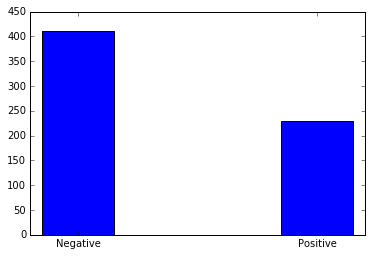

In [313]:
fig,ax = plt.subplots()
width=0.3
ax.bar(np.arange(2), (c[-1],c[1]),align='center', width=width)
ax.set_xticks(np.arange(2))
ax.set_xticklabels(("Negative", "Positive"))